In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-dataset-for-data-analysis/project1_df.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/ecommerce-dataset-for-data-analysis/project1_df.csv')

In [4]:
data.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [5]:
## finding out if there are any missing or null values
null_values = data.isnull().sum()
print(null_values)

CID                          0
TID                          0
Gender                       0
Age Group                    0
Purchase Date                0
Product Category             0
Discount Availed             0
Discount Name            27585
Discount Amount (INR)        0
Gross Amount                 0
Net Amount                   0
Purchase Method              0
Location                     0
dtype: int64


In [6]:
#Only discount names have null values. Need to check further if for all these rows the discount amount is 0
data[data.isnull().any(axis=1)]['Discount Amount (INR)'].value_counts()
# all these values have no discounts

Discount Amount (INR)
0.0    27585
Name: count, dtype: int64

In [7]:
data[data['Gross Amount'] == 0].shape

(0, 13)

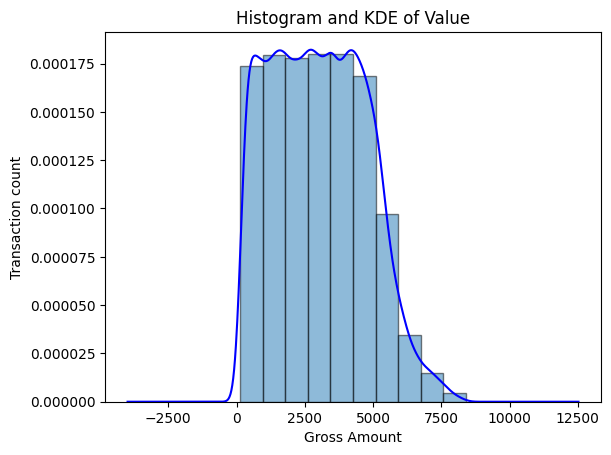

In [8]:
data['Gross Amount'].plot(kind='hist', bins=10, density=True, alpha=0.5, edgecolor='black')
data['Gross Amount'].plot(kind='kde', color='blue')

plt.title('Histogram and KDE of Value')
plt.xlabel('Gross Amount')
plt.ylabel('Transaction count')
plt.show()

In [9]:
data[data['Net Amount'] == 0].shape

(0, 13)

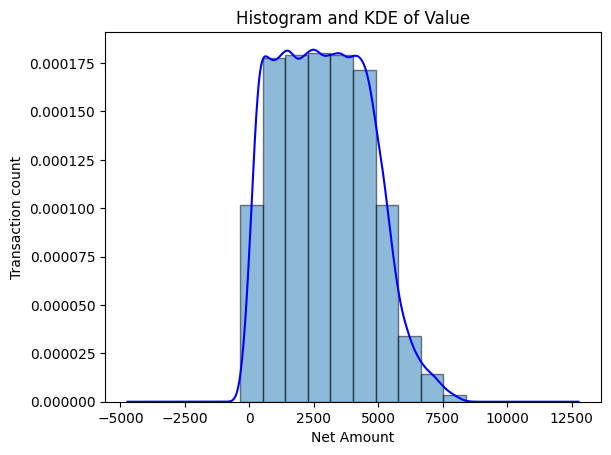

In [10]:
data['Net Amount'].plot(kind='hist', bins=10, density=True, alpha=0.5, edgecolor='black')
data['Net Amount'].plot(kind='kde', color='blue')

plt.title('Histogram and KDE of Value')
plt.xlabel('Net Amount')
plt.ylabel('Transaction count')
plt.show()

In [11]:
data.shape

(55000, 13)

In [12]:
data[data['Net Amount'] < 0].shape

(613, 13)

In [13]:
data[data['Net Amount'] < 0].head(10)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
311,565676,1356242586,Male,45-60,03/05/2020 20:14:16,Beauty and Health,Yes,NEWYEARS,469.58,279.258000,-190.322000,Debit Card,Mumbai
383,101206,4082960786,Female,18-25,05/05/2020 07:02:36,Electronics,Yes,NEWYEARS,358.58,204.886500,-153.693500,Debit Card,Delhi
398,270557,9264884678,Male,45-60,06/03/2021 12:54:09,Home & Kitchen,Yes,WELCOME5,385.36,246.808100,-138.551900,Debit Card,Bangalore
489,334639,1610899978,Male,18-25,18/09/2022 22:31:07,Home & Kitchen,Yes,NEWYEARS,427.33,348.448275,-78.881725,Credit Card,Delhi
564,924584,8564435752,Other,25-45,13/02/2020 05:04:55,Electronics,Yes,SAVE10,429.49,414.914325,-14.575675,Credit Card,Delhi
727,668011,7768688660,Other,25-45,04/08/2020 15:16:03,Toys & Games,Yes,FESTIVE50,457.35,334.771500,-122.578500,Credit Card,Kolkata
749,791354,3892005700,Female,18-25,28/01/2024 09:39:24,Electronics,Yes,WELCOME5,467.24,391.320000,-75.920000,Debit Card,Bangalore
842,805756,7336450279,Female,18-25,06/12/2019 05:04:50,Sports & Fitness,Yes,SEASONALOFFER21,421.74,255.668000,-166.072000,International Card,Chennai
908,246918,9917876228,Male,18-25,25/04/2021 06:01:07,Sports & Fitness,Yes,FESTIVE50,405.14,388.322000,-16.818000,Credit Card,Chennai
1087,982725,2456222474,Other,under 18,27/07/2020 02:57:56,Sports & Fitness,Yes,NEWYEARS,392.12,186.363450,-205.756550,Debit Card,Dehradun


In [14]:
## need to remove those rows before proceeding further
data = data[data['Net Amount'] > 0]
data.shape

(54387, 13)

## Ideas:
1. Number of unique customers
2. Customer distribution by location
3. Customer distribution by age
4. Customer distribution by gender
5. Gender distribution by product category
6. Gender distribution by discount availed
7. Gender distribution by amount spent
8. Gender distribution mode of payment
9. Gender distribution by location -  metro vs non metro
10. Gender distribution by age group
11. Age group by purchase date (weekday vs weekend) (month end vs beginning of month)
12. Age group by product category (is there any correlation - like maybe younger people purchasing more electronics)
13. Age group by discount availed (maybe younger people avail more discounts - check this both by number of discount transactions and avg. discount %)
14. Age group by amount spent
15. Age group by mode of purchase
16. Age group by location (metro vs non metro)
17. From purchase date and time 5 features can be extracted (weekday vs weekend) (first week of month vs last week) (year) (seasons - maybe quarters) (time of the day 12 am to 6 am, 6am to 6 pm, 6 pm to 12 am)
18. Date time features by amount spent
19. Date time features by average discount availed
20. Date time features by location (also can be viewed by metro vs non metro)
21. Date time features by purchase method
22. Product category by discount availed (also average discount % availed)
23. Prodcut category by net amount
24. Product category by purcahse method
25. prodcut category by location
26. Discount percentage under each payment mode
27. Discount percentage by each location
28. Total amount spent by payment mode
29. Total amount spent by location
30. Payment mode by location

## Feature Extraction

### 1. Metro and non metro cities

In [15]:
full_city_list = list(data.Location.unique())

In [16]:
Tier1  = ['Bangalore', 'Delhi','Chennai','Hyderabad','Mumbai','Kolkata']
Tier2 = [x for x in full_city_list if x not in Tier1]

In [17]:
Tier2

['Ahmedabad',
 'Other',
 'Dehradun',
 'Pune',
 'Jaipur',
 'Lucknow',
 'Srinagar',
 'Varanasi']

In [18]:
def metro_cities(city):
    if city in Tier1:
        return 'Metro'
    else:
        return 'Non Metro'

In [19]:
data['Location2'] = data['Location'].apply(metro_cities)

In [20]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Location2
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,Non Metro
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,Metro
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,Metro
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi,Metro
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,Metro


### 2. Date Time Features

In [21]:
data.dtypes

CID                        int64
TID                        int64
Gender                    object
Age Group                 object
Purchase Date             object
Product Category          object
Discount Availed          object
Discount Name             object
Discount Amount (INR)    float64
Gross Amount             float64
Net Amount               float64
Purchase Method           object
Location                  object
Location2                 object
dtype: object

In [22]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'],dayfirst=True)

In [23]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Location2
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,Non Metro
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,Metro
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,Metro
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi,Metro
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,Metro


In [24]:
data['Year'] = data['Purchase Date'].dt.year
data['Month'] = data['Purchase Date'].dt.month
data['Day'] = data['Purchase Date'].dt.day
data['Hour_of_day'] = data['Purchase Date'].dt.hour
data['day_of_week'] = data['Purchase Date'].dt.day_name()
# data['Time'] = data['Purchase Date'].dt.time
# data['Day_of_Week'] = data['Purchase Date'].dt.weekday

In [25]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Location2,Year,Month,Day,Hour_of_day,day_of_week
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,Non Metro,2023,8,30,20,Wednesday
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,Metro,2024,2,23,9,Friday
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,Metro,2022,3,6,9,Sunday
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi,Metro,2020,11,4,4,Wednesday
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,Metro,2022,5,31,17,Tuesday


In [26]:
data.day_of_week.unique()

array(['Wednesday', 'Friday', 'Sunday', 'Tuesday', 'Monday', 'Saturday',
       'Thursday'], dtype=object)

In [27]:
def weekend(day):
    if day in ['Wednesday', 'Friday', 'Tuesday', 'Monday','Thursday']:
        return 'No'
    else:
        return 'Yes'

In [28]:
data['weekend'] = data['day_of_week'].apply(weekend)

In [29]:
def day_night(time):
    if time >= 6 and time < 18:
        return 'day'
    else:
        return 'night'

data['day_night'] = data['Hour_of_day'].apply(day_night)

data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Purchase Method,Location,Location2,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Credit Card,Ahmedabad,Non Metro,2023,8,30,20,Wednesday,No,night
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Credit Card,Bangalore,Metro,2024,2,23,9,Friday,No,day
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Credit Card,Delhi,Metro,2022,3,6,9,Sunday,Yes,day
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,Debit Card,Delhi,Metro,2020,11,4,4,Wednesday,No,night
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Credit Card,Delhi,Metro,2022,5,31,17,Tuesday,No,day


In [30]:
def month_progression(date):
    if date <= 7:
        return 'start'
    elif date > 23:
        return 'end'
    else:
        return 'middle'

data['time_of_month'] = data['Day'].apply(month_progression)

data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Location,Location2,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Ahmedabad,Non Metro,2023,8,30,20,Wednesday,No,night,end
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Bangalore,Metro,2024,2,23,9,Friday,No,day,middle
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Delhi,Metro,2022,3,6,9,Sunday,Yes,day,start
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,Delhi,Metro,2020,11,4,4,Wednesday,No,night,start
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Delhi,Metro,2022,5,31,17,Tuesday,No,day,end


### 3. Discount percent

In [31]:
data['Discount percent'] = (data['Discount Amount (INR)']/data['Gross Amount'])*100

In [32]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

## Analysis Begins

### 1. No. of unique customers

In [33]:
data.CID.nunique()

28921

### 2. Customer distribution by location

In [34]:
data.groupby('Location')['CID'].nunique().sort_values(ascending=False)

Location
Mumbai       9598
Delhi        9352
Bangalore    7306
Hyderabad    5120
Chennai      4078
Pune         3576
Ahmedabad    2655
Kolkata      2600
Jaipur       1619
Lucknow      1099
Other        1014
Varanasi      596
Dehradun      543
Srinagar      543
Name: CID, dtype: int64

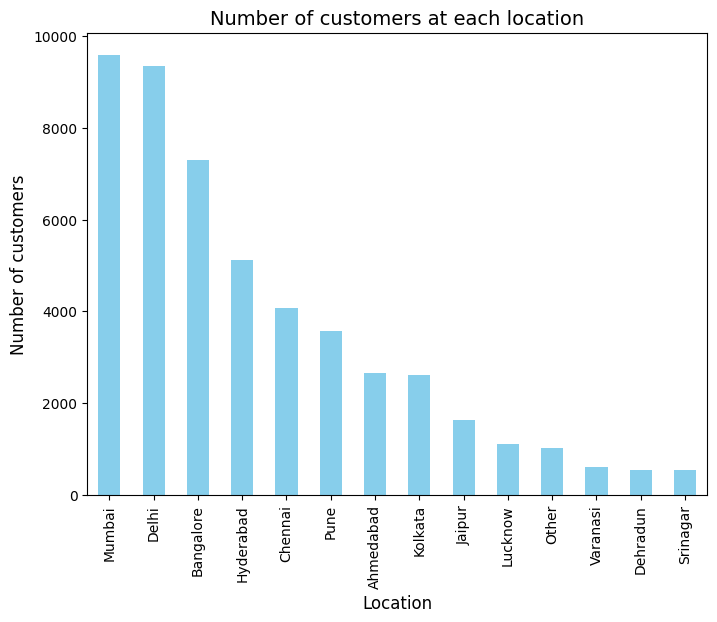

In [35]:
location_unique = data.groupby('Location')['CID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(8,6))
location_unique.plot(kind='bar', color='skyblue')

plt.title('Number of customers at each location',fontsize=14)
plt.xlabel('Location',fontsize=12)
plt.ylabel('Number of customers',fontsize=12)

plt.xticks(rotation=90)
plt.show()

In [36]:
data.groupby('Location2')['CID'].nunique().sort_values(ascending=False)

Location2
Metro        25504
Non Metro    10282
Name: CID, dtype: int64

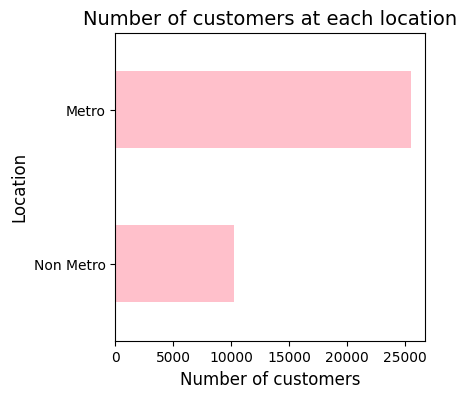

In [37]:
location_unique2 = data.groupby('Location2')['CID'].nunique().sort_values(ascending=True)

plt.figure(figsize=(4,4))
location_unique2.plot(kind='barh', color='pink')

plt.title('Number of customers at each location',fontsize=14)
plt.xlabel('Number of customers',fontsize=12)
plt.ylabel('Location',fontsize=12)

plt.yticks(rotation=0)
plt.show()

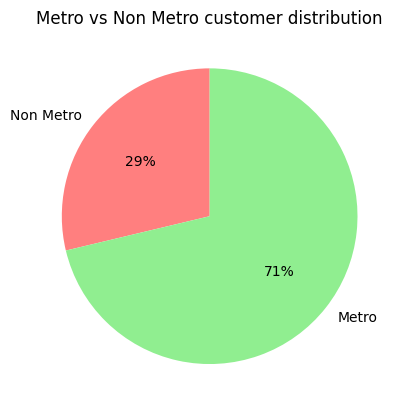

In [38]:
### plotting a pie chart
location_unique2.plot(kind='pie',autopct='%1.0f%%',startangle=90,colors=['#FF7F7F','lightgreen'])
plt.title('Metro vs Non Metro customer distribution')
plt.ylabel('')
plt.show()

### 3. Customer distribution by age

In [39]:
custom_order = ['under 18','18-25','25-45', '45-60', '60 and above']
data.groupby('Age Group')['CID'].nunique()[custom_order]

Age Group
under 18         2624
18-25           13237
25-45           16559
45-60            9577
60 and above     2556
Name: CID, dtype: int64

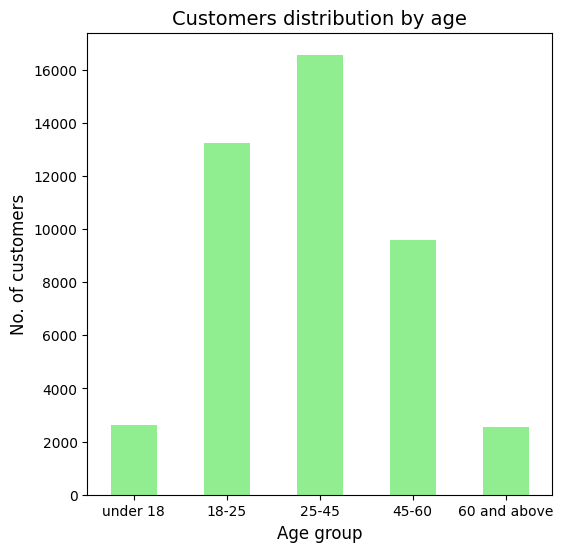

In [40]:
cust_age_group = data.groupby('Age Group')['CID'].nunique()[custom_order]

plt.figure(figsize=(6,6))
cust_age_group.plot(kind='bar',color='lightgreen')

plt.title('Customers distribution by age',fontsize=14)
plt.xlabel('Age group', fontsize=12)
plt.ylabel('No. of customers', fontsize = 12)

plt.xticks(rotation = 0)
plt.show()



### 4. Customer distribution by Gender

In [41]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [42]:
data.Gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [43]:
custom_order_gender = ['Male', 'Female', 'Other'] 
data.groupby('Gender')['CID'].nunique()[custom_order_gender]

Gender
Male      14238
Female    14412
Other     14531
Name: CID, dtype: int64

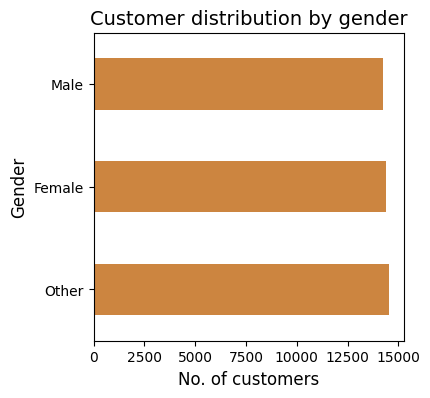

In [44]:
custom_order_gender2 = ['Other', 'Female','Male'] 
cust_dist_gender = data.groupby('Gender')['CID'].nunique()[custom_order_gender2]

plt.figure(figsize=(4,4))
cust_dist_gender.plot(kind='barh', color=(0.8, 0.52, 0.25))

plt.title('Customer distribution by gender',fontsize=14)
plt.xlabel('No. of customers',fontsize=12)
plt.ylabel('Gender',fontsize=12)

plt.yticks(rotation =0)
plt.show()

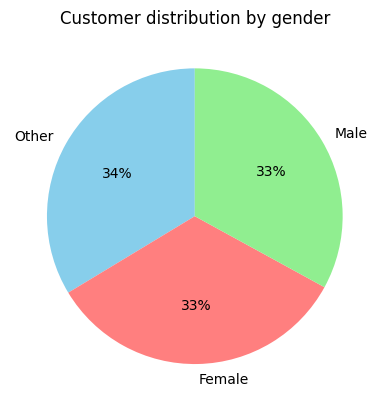

In [45]:
## plotting the pir chat for the same
cust_dist_gender.plot(kind='pie',autopct='%1.0f%%',startangle = 90,colors=['skyblue','#FF7F7F','lightgreen'])
plt.title('Customer distribution by gender')
plt.ylabel('')
plt.show()

### 5. Gender distribution by product category

In [46]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Location2,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month,Discount percent
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,Non Metro,2023,8,30,20,Wednesday,No,night,end,8.865248
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,Metro,2024,2,23,9,Friday,No,day,middle,3.776467
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,Metro,2022,3,6,9,Sunday,Yes,day,start,10.649563
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,Metro,2020,11,4,4,Wednesday,No,night,start,0.000000
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,Metro,2022,5,31,17,Tuesday,No,day,end,19.188263


In [48]:
counts = data.groupby(['Gender','Product Category'])['TID'].size().unstack()
percent = (counts.div(counts.sum(axis=0),axis=1)*100).map(lambda x: f'{int(x)}%')
percent

Product Category,Beauty and Health,Books,Clothing,Electronics,Home & Kitchen,Other,Pet Care,Sports & Fitness,Toys & Games
Gender,,,,,,,,,
Female,33%,32%,34%,32%,33%,35%,34%,33%,33%
Male,33%,34%,32%,33%,32%,31%,32%,32%,30%
Other,32%,33%,33%,33%,34%,32%,32%,34%,35%


In [49]:
data.groupby(['Product Category','Gender'])['TID'].count()

Product Category   Gender
Beauty and Health  Female    2779
                   Male      2781
                   Other     2695
Books              Female     878
                   Male       944
                   Other      912
Clothing           Female    3727
                   Male      3487
                   Other     3619
Electronics        Female    5358
                   Male      5481
                   Other     5523
Home & Kitchen     Female    1823
                   Male      1740
                   Other     1866
Other              Female     756
                   Male       680
                   Other      707
Pet Care           Female     554
                   Male       528
                   Other      523
Sports & Fitness   Female    1844
                   Male      1793
                   Other     1877
Toys & Games       Female     509
                   Male       459
                   Other      544
Name: TID, dtype: int64

In [50]:
### the above distribution gives no trend. It shows that under each product category there is same gender distribution. 
### Check the total transaction amount to get some sense.
data.groupby(['Product Category','Gender'])['Net Amount'].sum().round(2).apply(lambda x: f'{x:,}')

### There is no trend here as well

Product Category   Gender
Beauty and Health  Female     8,153,338.01
                   Male        8,161,475.0
                   Other      7,878,581.74
Books              Female      2,488,893.6
                   Male       2,717,909.33
                   Other      2,728,670.86
Clothing           Female    10,689,191.19
                   Male       9,974,842.04
                   Other     10,570,551.04
Electronics        Female    15,497,969.22
                   Male      15,842,996.24
                   Other     16,166,747.34
Home & Kitchen     Female      5,411,659.1
                   Male       5,050,407.81
                   Other      5,437,134.34
Other              Female     2,178,397.17
                   Male       1,941,046.29
                   Other      2,092,930.84
Pet Care           Female     1,529,999.78
                   Male       1,533,978.29
                   Other      1,574,491.43
Sports & Fitness   Female     5,274,490.78
                   Male     

In [51]:
counts = data.groupby(['Gender','Product Category'])['Net Amount'].sum().unstack()
percent = (counts.div(counts.sum(axis=0),axis=1)*100).map(lambda x: f'{int(x)}%')
percent

Product Category,Beauty and Health,Books,Clothing,Electronics,Home & Kitchen,Other,Pet Care,Sports & Fitness,Toys & Games
Gender,,,,,,,,,
Female,33%,31%,34%,32%,34%,35%,32%,32%,33%
Male,33%,34%,31%,33%,31%,31%,33%,32%,30%
Other,32%,34%,33%,34%,34%,33%,33%,34%,35%


### 6. Gender distribution by discount availed

In [52]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [53]:
data.groupby('Gender')['Discount percent'].mean()
## no trend

Gender
Female    7.204847
Male      7.159572
Other     7.056250
Name: Discount percent, dtype: float64

### 8. Gender distribution mode of payment

In [54]:
data.groupby(['Purchase Method','Gender'])['TID'].count()

Purchase Method     Gender
Cash on Delivery    Female     889
                    Male       900
                    Other      946
Credit Card         Female    7351
                    Male      7181
                    Other     7339
Debit Card          Female    4529
                    Male      4554
                    Other     4558
Google Pay UPI      Female     924
                    Male       877
                    Other      837
International Card  Female     970
                    Male       848
                    Other      966
Net Banking         Female    1792
                    Male      1760
                    Other     1866
Paytm UPI           Female     847
                    Male       916
                    Other      882
PhonePe UPI         Female     926
                    Male       857
                    Other      872
Name: TID, dtype: int64

In [55]:
data.groupby(['Purchase Method','Gender'])['TID'].count().unstack().sort_values(by = 'Purchase Method',ascending=False)

Gender,Female,Male,Other
Purchase Method,,,
PhonePe UPI,926,857,872
Paytm UPI,847,916,882
Net Banking,1792,1760,1866
International Card,970,848,966
Google Pay UPI,924,877,837
Debit Card,4529,4554,4558
Credit Card,7351,7181,7339
Cash on Delivery,889,900,946


<Figure size 800x800 with 0 Axes>

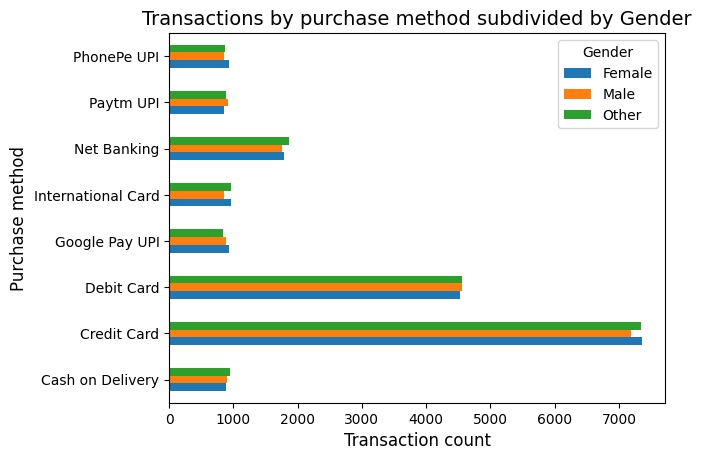

In [56]:
grouped =  data.groupby(['Purchase Method','Gender'])['TID'].count().unstack()

plt.figure(figsize=(8,8))
grouped.plot(kind='barh',stacked=False)

plt.title('Transactions by purchase method subdivided by Gender',fontsize=14)
plt.xlabel('Transaction count',fontsize = 12)
plt.ylabel('Purchase method', fontsize=12)

# plt.xticks(rotation=90)
plt.show()



In [57]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

### 9. Gender distribution by location - metro vs non metro

In [58]:
data.groupby(['Location2','Gender'])['TID'].count().unstack()

Gender,Female,Male,Other
Location2,,,
Metro,14142,14033,14216
Non Metro,4086,3860,4050


### 10. Gender distribution by age group

In [59]:
data.groupby(['Age Group','Gender'])['TID'].count().unstack()

Gender,Female,Male,Other
Age Group,,,
18-25,5405,5356,5475
25-45,7273,7226,7290
45-60,3710,3590,3677
60 and above,918,849,887
under 18,922,872,937


### 11. Age group by purchase date (weekday vs weekend) (month end vs beginning of month)

In [60]:
data.groupby(['weekend','Age Group'])['TID'].count().unstack()

Age Group,18-25,25-45,45-60,60 and above,under 18
weekend,,,,,
No,11583,15534,7825,1889,1930
Yes,4653,6255,3152,765,801


### 12. Age group by product category (is there any correlation - like maybe younger people purchasing more electronics)

In [61]:
counts = data.groupby('Age Group')['TID'].count()[custom_order]
percent = (counts/counts.sum()*100).map(lambda x: f"{int(x)}%")
percent

Age Group
under 18         5%
18-25           29%
25-45           40%
45-60           20%
60 and above     4%
Name: TID, dtype: object

In [62]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [63]:
counts = data.groupby(['Product Category','Age Group'])['TID'].count().unstack()
percent = (counts.div(counts.sum(axis=1),axis=0)*100).map(lambda x: f"{int(x)}%")
# counts = counts.reset_index()
# counts['Age Group'] = pd.Categorical(counts['Age Group'],categories=custom_order,ordered=True)
# counts = counts.sort_values(by='Age Group')
percent

Age Group,18-25,25-45,45-60,60 and above,under 18
Product Category,,,,,
Beauty and Health,30%,39%,20%,4%,5%
Books,28%,39%,20%,5%,5%
Clothing,30%,39%,20%,4%,4%
Electronics,30%,40%,19%,4%,5%
Home & Kitchen,29%,40%,19%,4%,5%
Other,28%,40%,21%,4%,4%
Pet Care,30%,39%,19%,5%,4%
Sports & Fitness,28%,40%,21%,5%,4%
Toys & Games,29%,42%,19%,4%,4%


### 13. Age group by discount availed (maybe younger people avail more discounts - check this both by number of discount transactions and avg. discount %)

In [64]:
data.groupby('Age Group')['Discount percent'].mean().map(lambda x: f'{x:.2f}%')[custom_order]

Age Group
under 18        6.84%
18-25           7.19%
25-45           7.05%
45-60           7.22%
60 and above    7.52%
Name: Discount percent, dtype: object

In [65]:
## Checking by number of transactions
data[data['Discount percent'] > 0].groupby('Age Group')['TID'].size()[custom_order]

Age Group
under 18         1322
18-25            7953
25-45           10747
45-60            5455
60 and above     1325
Name: TID, dtype: int64

In [66]:
## cheking the distribution in percent terms
counts = data[data['Discount percent'] > 0].groupby('Age Group')['TID'].size()[custom_order]
percent = (counts/counts.sum()*100).map(lambda x: f'{int(x)}%')
percent

# same as the original distribution

Age Group
under 18         4%
18-25           29%
25-45           40%
45-60           20%
60 and above     4%
Name: TID, dtype: object

In [67]:
## findout under each category what percentage of transactions are discount availed
grouped = data.groupby('Age Group').agg(
    Discount_availed = ('Discount percent',lambda x: (x>0).sum()),
    total_transactions = ('Discount percent','size')
).reindex(custom_order)

grouped['ratio'] = ((grouped['Discount_availed']/grouped['total_transactions'])*100).map(lambda x: f'{x:.1f}%')
grouped

,Discount_availed,total_transactions,ratio
Age Group,,,
under 18,1322,2731,48.4%
18-25,7953,16236,49.0%
25-45,10747,21789,49.3%
45-60,5455,10977,49.7%
60 and above,1325,2654,49.9%


### 14. Age group by amount spent

In [68]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [69]:
data.groupby('Age Group')['Net Amount'].sum().round(2).apply(lambda x: f'{x:,}')[custom_order]

Age Group
under 18         8,011,075.68
18-25           46,825,719.95
25-45           63,958,916.06
45-60           31,697,281.58
60 and above     7,751,632.95
Name: Net Amount, dtype: object

In [70]:
amount_spent = data.groupby('Age Group')['Net Amount'].sum()[custom_order]
percent = (amount_spent/amount_spent.sum()*100).map(lambda x: f'{int(x)}%')
percent

Age Group
under 18         5%
18-25           29%
25-45           40%
45-60           20%
60 and above     4%
Name: Net Amount, dtype: object

### 15. Age group by mode of purchase

In [71]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [72]:
counts = data.groupby(['Purchase Method','Age Group'])['TID'].size().unstack()
percent = (counts.div(counts.sum(axis=1),axis=0)*100).map(lambda x: f'{int(x)}%')
percent

Age Group,18-25,25-45,45-60,60 and above,under 18
Purchase Method,,,,,
Cash on Delivery,29%,39%,19%,5%,5%
Credit Card,29%,40%,20%,4%,4%
Debit Card,30%,39%,20%,4%,5%
Google Pay UPI,30%,39%,19%,5%,5%
International Card,29%,39%,20%,4%,5%
Net Banking,29%,41%,20%,4%,4%
Paytm UPI,29%,41%,19%,4%,5%
PhonePe UPI,29%,41%,19%,5%,5%


### 16. Age group by location (metro vs non metro)

In [73]:
counts = data.groupby(['Location2','Age Group'])['TID'].size().unstack()
percent = (counts.div(counts.sum(axis=1),axis=0)*100).map(lambda x: f'{int(x)}%')
percent

Age Group,18-25,25-45,45-60,60 and above,under 18
Location2,,,,,
Metro,29%,39%,20%,4%,5%
Non Metro,29%,40%,19%,4%,4%


In [74]:
counts = data.groupby(['Location2','Age Group'])['TID'].size().unstack()
percent = (counts.div(counts.sum(axis=0),axis=1)*100).map(lambda x: f'{int(x)}%')
percent
## maybe in metro location people are sepnding more per customer(coz the customer split in 71-29, but the transaction split is around 77-22)

Age Group,18-25,25-45,45-60,60 and above,under 18
Location2,,,,,
Metro,77%,77%,78%,77%,78%
Non Metro,22%,22%,21%,22%,21%


### 17. Date time features by amount spent

**a. Weekday vs Weekend average amount spent**

In [75]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent'],
      dtype='object')

In [76]:
data.groupby('weekend')['Net Amount'].mean()
## surprisingly less amount spent in the weekend

weekend
No     2916.125702
Yes    2893.426204
Name: Net Amount, dtype: float64

In [77]:
## total transactions in weekend vs weekdays
data.groupby('weekend')['TID'].size()


weekend
No     38761
Yes    15626
Name: TID, dtype: int64

In [78]:
## extracting full date
data['full_date'] = data['Purchase Date'].dt.date
data.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month,Discount percent,full_date
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,2023,8,30,20,Wednesday,No,night,end,8.865248,2023-08-30
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,2024,2,23,9,Friday,No,day,middle,3.776467,2024-02-23
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,2022,3,6,9,Sunday,Yes,day,start,10.649563,2022-03-06
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,2020,11,4,4,Wednesday,No,night,start,0.000000,2020-11-04
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,2022,5,31,17,Tuesday,No,day,end,19.188263,2022-05-31


In [79]:
## total number of weekdays vs weekends
count1 = data.groupby('weekend')['full_date'].nunique()
count2 = data.groupby('weekend')['TID'].size()
count2/count1
## same number of transactions on either weekend or weekday

weekend
No     29.701916
Yes    29.934866
dtype: float64

****b. day vs night****

In [80]:
data.groupby('day_night')['Net Amount'].mean()
## surprisingly similar amount

day_night
day      2909.810255
night    2909.394777
Name: Net Amount, dtype: float64

In [81]:
## no of transactions day vs night
count = data.groupby('day_night')['TID'].size()
percent = (count/count.sum()*100).map(lambda x: f'{x:.1f}%')
percent
## slightly higher number in day

day_night
day      50.3%
night    49.7%
Name: TID, dtype: object

**c. time of the month**

In [82]:
## per transaction spending as month progresses
data.groupby('time_of_month')['Net Amount'].mean()

time_of_month
end       2933.346326
middle    2895.586158
start     2915.747951
Name: Net Amount, dtype: float64

In [83]:
## per day spending as month progresses
data.groupby('time_of_month')['Net Amount'].sum()/data.groupby('time_of_month')['full_date'].nunique()
## surprisingly high in the end of the month

time_of_month
end       88610.683296
middle    85540.441083
start     86944.826986
dtype: float64

**d. trend by year**

In [84]:
## per transaction spending as year progresses
data.groupby('Year')['Net Amount'].mean()

Year
2019    3112.481447
2020    2687.965996
2021    2813.163094
2022    2957.622279
2023    3098.485534
2024    2944.105993
Name: Net Amount, dtype: float64

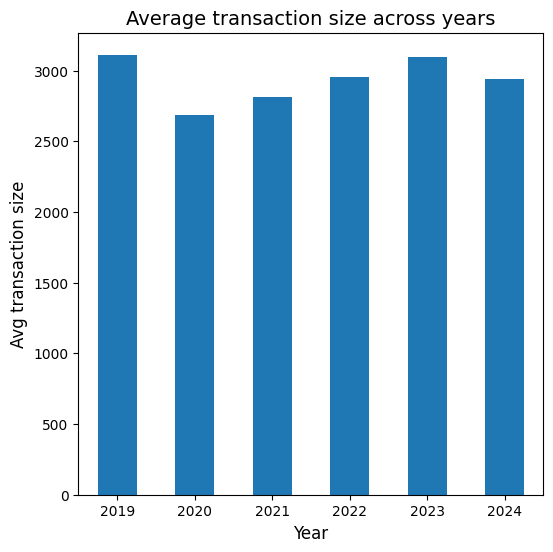

In [85]:
amount_per_transaction = data.groupby('Year')['Net Amount'].mean()

plt.figure(figsize=(6,6))
amount_per_transaction.plot(kind='bar')

plt.title('Average transaction size across years',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Avg transaction size',fontsize=12)

plt.xticks(rotation=0)
plt.show()

In [86]:
## total amount spent as years progress
data.groupby('Year')['Net Amount'].sum().round(2).apply(lambda x: f'{x:,}')

Year
2019     9,542,868.12
2020    29,344,524.78
2021    30,697,235.68
2022    31,909,786.76
2023    33,850,954.45
2024    22,899,256.42
Name: Net Amount, dtype: object

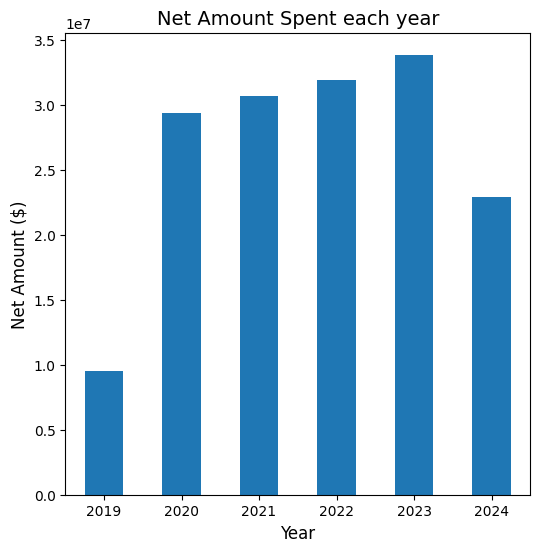

In [87]:
grouped = data.groupby('Year')['Net Amount'].sum()

plt.figure(figsize=(6,6))
grouped.plot(kind='bar')

plt.title('Net Amount Spent each year', fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Net Amount ($)',fontsize=12)

plt.xticks(rotation=0)
plt.show()

In [88]:
grouped_final = grouped.reset_index()
grouped_final

,Year,Net Amount
0,2019,9.542868e+06
1,2020,2.934452e+07
2,2021,3.069724e+07
3,2022,3.190979e+07
4,2023,3.385095e+07
5,2024,2.289926e+07


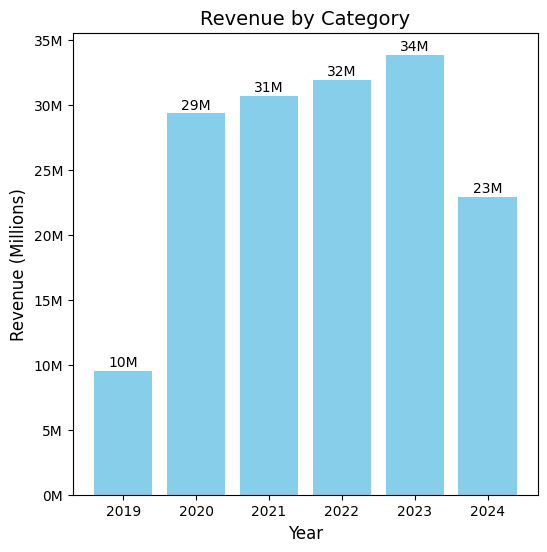

In [89]:
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(grouped_final['Year'],grouped_final['Net Amount'] , color='skyblue')

# Set y-axis to be in millions (i.e., 1e6)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x*1e-6)}M'))

# Add the values on top of each bar (rounded to the nearest million)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 100000,  # Position text above the bar
            f'{int(round(height / 1e6))}M',  # Display value in millions, rounded
            ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
ax.set_ylabel('Revenue (Millions)',fontsize=12)
ax.set_title('Revenue by Category',fontsize=14)
ax.set_xlabel('Year',fontsize=12)

# Show the plot
plt.show()

In [90]:
## amount spent per day as years progress
data.groupby('Year')['Net Amount'].sum()/data.groupby('Year')['full_date'].nunique()

Year
2019    91758.347260
2020    80176.297205
2021    84102.015566
2022    87424.073324
2023    92742.340970
2024    87401.742047
dtype: float64

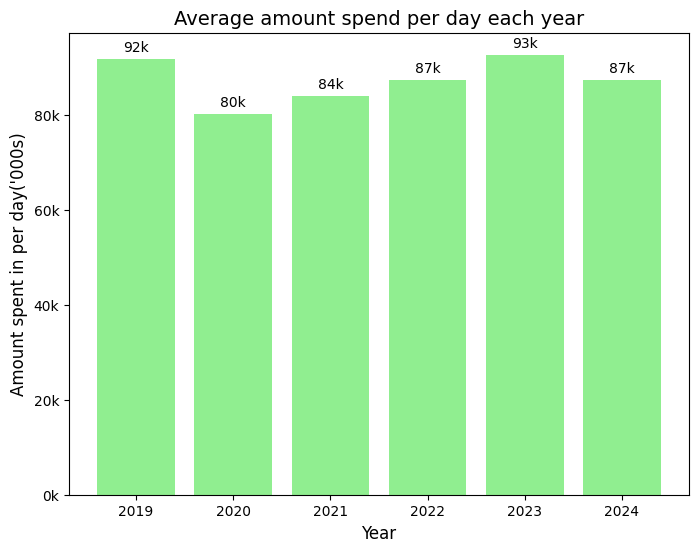

In [91]:
grouped = (data.groupby('Year')['Net Amount'].sum()/data.groupby('Year')['full_date'].nunique()).reset_index()
grouped.rename(columns={0:'amount_spent_per_day'},inplace=True)

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(grouped['Year'],grouped['amount_spent_per_day'] , color='lightgreen')

# Set y-axis to be in millions (i.e., 1e6)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x*1e-3)}k'))

# Add the values on top of each bar (rounded to the nearest million)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1000,  # Position text above the bar
            f'{int(round(height / 1e3))}k',  # Display value in millions, rounded
            ha='center', va='bottom', fontsize=10, color='black')

# Set labels and title
ax.set_ylabel("Amount spent in per day('000s)",fontsize=12)
ax.set_title('Average amount spend per day each year',fontsize=14)
ax.set_xlabel('Year',fontsize=12)

# Show the plot
plt.show()



In [92]:
## average amount spent by each customer as years progress
data.groupby('Year')['Net Amount'].sum()/data.groupby('Year')['CID'].nunique()

Year
2019    3248.083089
2020    3099.337218
2021    3233.330070
2022    3405.163458
2023    3559.137257
2024    3226.610739
dtype: float64

### 18. Date time features by average discount availed

In [93]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month,Discount percent,full_date
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,2023,8,30,20,Wednesday,No,night,end,8.865248,2023-08-30
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,2024,2,23,9,Friday,No,day,middle,3.776467,2024-02-23
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,2022,3,6,9,Sunday,Yes,day,start,10.649563,2022-03-06
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,2020,11,4,4,Wednesday,No,night,start,0.000000,2020-11-04
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,2022,5,31,17,Tuesday,No,day,end,19.188263,2022-05-31


In [94]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [95]:
data.groupby('day_night')['Discount percent'].mean()

day_night
day      7.177801
night    7.101790
Name: Discount percent, dtype: float64

In [96]:
data.groupby('time_of_month')['Discount percent'].mean()

time_of_month
end       7.029634
middle    7.175599
start     7.178577
Name: Discount percent, dtype: float64

In [97]:
data.groupby('weekend')['Discount percent'].mean()

weekend
No     7.133149
Yes    7.157151
Name: Discount percent, dtype: float64

In [98]:
data.groupby('Year')['Discount percent'].mean()

Year
2019    6.666421
2020    7.465268
2021    7.468804
2022    6.948867
2023    6.962722
2024    6.923296
Name: Discount percent, dtype: float64

### 19. Date time features by location (also can be viewed by metro vs non metro)

In [99]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [100]:
value = data.groupby(['Year','Location2'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('Year').sum())*100).map(lambda x: f'{x:.1f}%')
percent

Year  Location2
2019  Metro        76.8%
      Non Metro    23.2%
2020  Metro        78.6%
      Non Metro    21.4%
2021  Metro        77.5%
      Non Metro    22.5%
2022  Metro        78.0%
      Non Metro    22.0%
2023  Metro        77.5%
      Non Metro    22.5%
2024  Metro        77.8%
      Non Metro    22.2%
Name: Net Amount, dtype: object

In [101]:
value = data.groupby('Location2')['Net Amount'].sum()
percent = ((value/value.sum())*100).map(lambda x: f'{x:.1f}%')
percent
# minimal spike in 2020 for metro regions

Location2
Metro        77.8%
Non Metro    22.2%
Name: Net Amount, dtype: object

In [102]:
value = data.groupby(['weekend','Location2'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('weekend').sum())*100).map(lambda x: f'{x:.1f}%')
percent

weekend  Location2
No       Metro        77.8%
         Non Metro    22.2%
Yes      Metro        77.9%
         Non Metro    22.1%
Name: Net Amount, dtype: object

In [103]:
value = data.groupby(['day_night','Location2'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('day_night').sum())*100).map(lambda x: f'{x:.1f}%')
percent

day_night  Location2
day        Metro        77.6%
           Non Metro    22.4%
night      Metro        78.0%
           Non Metro    22.0%
Name: Net Amount, dtype: object

In [104]:
value = data.groupby(['Location2','day_night'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('Location2').sum())*100).map(lambda x: f'{x:.1f}%')
percent

Location2  day_night
Metro      day          50.2%
           night        49.8%
Non Metro  day          50.8%
           night        49.2%
Name: Net Amount, dtype: object

In [105]:
value = data.groupby(['Location2','time_of_month'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('Location2').sum())*100).map(lambda x: f'{x:.1f}%')
percent

Location2  time_of_month
Metro      end              25.2%
           middle           51.6%
           start            23.2%
Non Metro  end              24.6%
           middle           52.9%
           start            22.5%
Name: Net Amount, dtype: object

In [106]:
value = data.groupby(['time_of_month'])['Net Amount'].sum().round(2)
percent = ((value/value.sum())*100).map(lambda x: f'{x:.1f}%')
percent

time_of_month
end       25.0%
middle    51.9%
start     23.1%
Name: Net Amount, dtype: object

In [107]:
value = data.groupby(['time_of_month','Location2'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('time_of_month').sum())*100).map(lambda x: f'{x:.1f}%')
percent

time_of_month  Location2
end            Metro        78.2%
               Non Metro    21.8%
middle         Metro        77.3%
               Non Metro    22.7%
start          Metro        78.4%
               Non Metro    21.6%
Name: Net Amount, dtype: object

### 20. Date time features by purchase method

In [108]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [109]:
dist = pd.DataFrame(data.groupby(['Purchase Method'])['Net Amount'].sum().round(2))
dist['percent'] = (dist['Net Amount']/dist['Net Amount'].sum()*100).map(lambda x: f'{x:.1f}%')
dist['Net Amount'] = dist['Net Amount'].map(lambda x: f'{x:,}')
dist

,Net Amount,percent
Purchase Method,,
Cash on Delivery,"7,791,550.87",4.9%
Credit Card,"63,715,974.39",40.3%
Debit Card,"39,789,299.34",25.1%
Google Pay UPI,"7,508,723.54",4.7%
International Card,"8,049,329.03",5.1%
Net Banking,"15,772,177.57",10.0%
Paytm UPI,"7,734,120.3",4.9%
PhonePe UPI,"7,883,451.16",5.0%


In [110]:
value = data.groupby(['time_of_month','Purchase Method'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('time_of_month').sum())*100).map(lambda x: f'{x:.1f}%')
percent

time_of_month  Purchase Method   
end            Cash on Delivery       5.0%
               Credit Card           40.5%
               Debit Card            24.7%
               Google Pay UPI         4.7%
               International Card     5.3%
               Net Banking           10.1%
               Paytm UPI              4.5%
               PhonePe UPI            5.1%
middle         Cash on Delivery       4.9%
               Credit Card           40.1%
               Debit Card            25.3%
               Google Pay UPI         4.7%
               International Card     5.0%
               Net Banking           10.0%
               Paytm UPI              5.0%
               PhonePe UPI            5.0%
start          Cash on Delivery       4.8%
               Credit Card           40.4%
               Debit Card            25.2%
               Google Pay UPI         4.9%
               International Card     5.1%
               Net Banking            9.8%
               Paytm

In [111]:
value = data.groupby(['Purchase Method','time_of_month'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('Purchase Method').sum())*100).map(lambda x: f'{x:.1f}%')
percent

Purchase Method     time_of_month
Cash on Delivery    end              25.5%
                    middle           52.0%
                    start            22.5%
Credit Card         end              25.2%
                    middle           51.7%
                    start            23.1%
Debit Card          end              24.6%
                    middle           52.2%
                    start            23.2%
Google Pay UPI      end              25.0%
                    middle           51.1%
                    start            24.0%
International Card  end              25.9%
                    middle           50.7%
                    start            23.4%
Net Banking         end              25.5%
                    middle           51.9%
                    start            22.7%
Paytm UPI           end              23.1%
                    middle           53.2%
                    start            23.7%
PhonePe UPI         end              25.6%
                    

In [112]:
value = data.groupby(['Year','Purchase Method'])['Net Amount'].sum().round(2)
percent = ((value/value.groupby('Year').sum())*100).map(lambda x: f'{x:.1f}%')
percent

Year  Purchase Method   
2019  Cash on Delivery       5.2%
      Credit Card           39.6%
      Debit Card            25.1%
      Google Pay UPI         5.0%
      International Card     4.7%
      Net Banking           10.8%
      Paytm UPI              4.4%
      PhonePe UPI            5.2%
2020  Cash on Delivery       4.8%
      Credit Card           40.7%
      Debit Card            24.8%
      Google Pay UPI         4.6%
      International Card     5.1%
      Net Banking            9.7%
      Paytm UPI              5.0%
      PhonePe UPI            5.2%
2021  Cash on Delivery       4.7%
      Credit Card           40.2%
      Debit Card            25.2%
      Google Pay UPI         5.0%
      International Card     5.0%
      Net Banking            9.9%
      Paytm UPI              4.9%
      PhonePe UPI            5.0%
2022  Cash on Delivery       4.7%
      Credit Card           40.0%
      Debit Card            25.2%
      Google Pay UPI         4.8%
      International Car

### 21.Product category by discount availed (also average discount % availed)

In [113]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [114]:
data['Discount percent'].mean()

7.140044897185805

In [115]:
data.groupby('Product Category')['Discount percent'].mean().apply(lambda x: f'{x:.1f}%')

Product Category
Beauty and Health    7.1%
Books                7.2%
Clothing             7.2%
Electronics          7.1%
Home & Kitchen       7.2%
Other                7.4%
Pet Care             6.9%
Sports & Fitness     7.1%
Toys & Games         6.8%
Name: Discount percent, dtype: object

In [116]:
data['Discount Amount (INR)'].mean().round(0)

134.0

In [117]:
data.groupby('Product Category')['Discount Amount (INR)'].mean().round(0).apply(lambda x: f'{x:,}')

Product Category
Beauty and Health    134.0
Books                135.0
Clothing             135.0
Electronics          133.0
Home & Kitchen       136.0
Other                136.0
Pet Care             132.0
Sports & Fitness     134.0
Toys & Games         136.0
Name: Discount Amount (INR), dtype: object

### 22.Prodcut category by net amount

In [118]:
grouped_final = pd.DataFrame(data.groupby('Product Category')['Net Amount'].sum()).reset_index()

In [119]:
grouped_final

,Product Category,Net Amount
0,Beauty and Health,2.419339e+07
1,Books,7.935474e+06
2,Clothing,3.123458e+07
3,Electronics,4.750771e+07
4,Home & Kitchen,1.589920e+07
5,Other,6.212374e+06
6,Pet Care,4.638469e+06
7,Sports & Fitness,1.614434e+07
8,Toys & Games,4.479071e+06


/tmp/ipykernel_30/716873602.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation


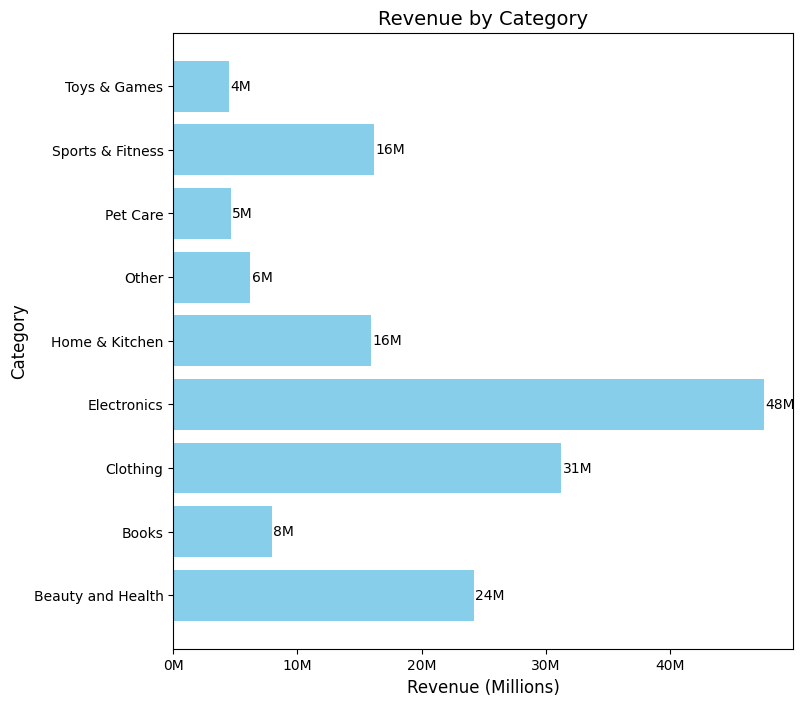

In [120]:
fig, ax = plt.subplots(figsize=(8,8))
bars = ax.barh(grouped_final['Product Category'],grouped_final['Net Amount'] , color='skyblue')

# Set y-axis to be in millions (i.e., 1e6)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x * 1e-6)}M'))

# Add the values on top of each bar (rounded to the nearest million)
for bar in bars:
    width = bar.get_width()  # For horizontal bars, width is the value
    ax.text(width + 100000,  # Position text to the right of the bar, slightly off the bar
            bar.get_y() + bar.get_height() / 2,  # Vertically centered text within the bar
            f'{int(round(width / 1e6))}M',  # Display value in millions, rounded
            ha='left', va='center', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Revenue (Millions)', fontsize=12)
ax.set_title('Revenue by Category', fontsize=14)
ax.set_ylabel('Category', fontsize=12)
# ax.set_xticks(range(len(data['Product Category'])))  # Set the positions of the ticks
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation
# Show the plot
plt.show()

In [121]:
value = data.groupby('Product Category')['Net Amount'].sum()
percent = (value/value.sum()*100).apply(lambda x: f'{x:.1f}%')
percent

Product Category
Beauty and Health    15.3%
Books                 5.0%
Clothing             19.7%
Electronics          30.0%
Home & Kitchen       10.0%
Other                 3.9%
Pet Care              2.9%
Sports & Fitness     10.2%
Toys & Games          2.8%
Name: Net Amount, dtype: object

### 23.Product category by purcahse method

In [122]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [123]:
category_by_purchase_method = pd.DataFrame(data.groupby(['Product Category','Purchase Method'])['Net Amount'].sum().round(0).apply(lambda x: f'{x:,}')).reset_index()
category_by_purchase_method

,Product Category,Purchase Method,Net Amount
0,Beauty and Health,Cash on Delivery,"1,283,690.0"
1,Beauty and Health,Credit Card,"9,741,557.0"
2,Beauty and Health,Debit Card,"6,092,340.0"
3,Beauty and Health,Google Pay UPI,"1,210,340.0"
4,Beauty and Health,International Card,"1,131,292.0"
...,...,...,...
67,Toys & Games,Google Pay UPI,"225,090.0"
68,Toys & Games,International Card,"218,954.0"
69,Toys & Games,Net Banking,"448,857.0"
70,Toys & Games,Paytm UPI,"188,708.0"


In [124]:
value = data.groupby(['Product Category','Purchase Method'])['Net Amount'].sum()
percent = (value/value.groupby('Product Category').sum()*100).apply(lambda x: f'{x:.1f}%')
# for group_name, group_data in percent:
#     print(f"Group: {group_name}")
#     print(group_data)  # Prints the entire group data
#     print()

In [125]:
percent_final = pd.DataFrame(percent).reset_index()
for row in percent_final.values:
    print(row)

['Beauty and Health' 'Cash on Delivery' '5.3%']
['Beauty and Health' 'Credit Card' '40.3%']
['Beauty and Health' 'Debit Card' '25.2%']
['Beauty and Health' 'Google Pay UPI' '5.0%']
['Beauty and Health' 'International Card' '4.7%']
['Beauty and Health' 'Net Banking' '9.5%']
['Beauty and Health' 'Paytm UPI' '5.1%']
['Beauty and Health' 'PhonePe UPI' '5.0%']
['Books' 'Cash on Delivery' '4.3%']
['Books' 'Credit Card' '40.7%']
['Books' 'Debit Card' '24.2%']
['Books' 'Google Pay UPI' '4.3%']
['Books' 'International Card' '4.5%']
['Books' 'Net Banking' '10.8%']
['Books' 'Paytm UPI' '4.4%']
['Books' 'PhonePe UPI' '6.8%']
['Clothing' 'Cash on Delivery' '5.0%']
['Clothing' 'Credit Card' '40.1%']
['Clothing' 'Debit Card' '24.8%']
['Clothing' 'Google Pay UPI' '4.5%']
['Clothing' 'International Card' '5.5%']
['Clothing' 'Net Banking' '10.0%']
['Clothing' 'Paytm UPI' '5.1%']
['Clothing' 'PhonePe UPI' '5.0%']
['Electronics' 'Cash on Delivery' '4.7%']
['Electronics' 'Credit Card' '40.5%']
['Electronic

In [126]:
pd.set_option('display.max_rows', None)  # None will display all rows
final_df = pd.DataFrame(percent).reset_index()
final_df

,Product Category,Purchase Method,Net Amount
0,Beauty and Health,Cash on Delivery,5.3%
1,Beauty and Health,Credit Card,40.3%
2,Beauty and Health,Debit Card,25.2%
3,Beauty and Health,Google Pay UPI,5.0%
4,Beauty and Health,International Card,4.7%
5,Beauty and Health,Net Banking,9.5%
6,Beauty and Health,Paytm UPI,5.1%
7,Beauty and Health,PhonePe UPI,5.0%
8,Books,Cash on Delivery,4.3%
9,Books,Credit Card,40.7%


In [127]:
pd.reset_option('display.max_rows')

### 24.prodcut category by location

In [128]:
category_by_purchase_method = pd.DataFrame(data.groupby(['Product Category','Location2'])['Net Amount'].sum().round(0).apply(lambda x: f'{x:,}')).reset_index()
category_by_purchase_method

,Product Category,Location2,Net Amount
0,Beauty and Health,Metro,"18,687,047.0"
1,Beauty and Health,Non Metro,"5,506,347.0"
2,Books,Metro,"6,152,081.0"
3,Books,Non Metro,"1,783,393.0"
4,Clothing,Metro,"24,267,003.0"
5,Clothing,Non Metro,"6,967,581.0"
6,Electronics,Metro,"37,043,651.0"
7,Electronics,Non Metro,"10,464,062.0"
8,Home & Kitchen,Metro,"12,357,398.0"
9,Home & Kitchen,Non Metro,"3,541,803.0"


In [129]:
value = data.groupby(['Product Category','Location2'])['Net Amount'].sum()
percent = (value/value.groupby('Product Category').sum()*100).apply(lambda x: f'{x:.1f}%')
percent

Product Category   Location2
Beauty and Health  Metro        77.2%
                   Non Metro    22.8%
Books              Metro        77.5%
                   Non Metro    22.5%
Clothing           Metro        77.7%
                   Non Metro    22.3%
Electronics        Metro        78.0%
                   Non Metro    22.0%
Home & Kitchen     Metro        77.7%
                   Non Metro    22.3%
Other              Metro        78.8%
                   Non Metro    21.2%
Pet Care           Metro        76.6%
                   Non Metro    23.4%
Sports & Fitness   Metro        78.8%
                   Non Metro    21.2%
Toys & Games       Metro        76.4%
                   Non Metro    23.6%
Name: Net Amount, dtype: object

### 25.Discount percentage under each payment mode


In [130]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [131]:
grouped_final = pd.DataFrame(data.groupby('Purchase Method')['Discount percent'].mean()).reset_index()
grouped_final

,Purchase Method,Discount percent
0,Cash on Delivery,7.249458
1,Credit Card,7.153353
2,Debit Card,7.187543
3,Google Pay UPI,7.551688
4,International Card,6.739888
5,Net Banking,6.899408
6,Paytm UPI,7.253831
7,PhonePe UPI,7.061970


/tmp/ipykernel_30/1629634284.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation


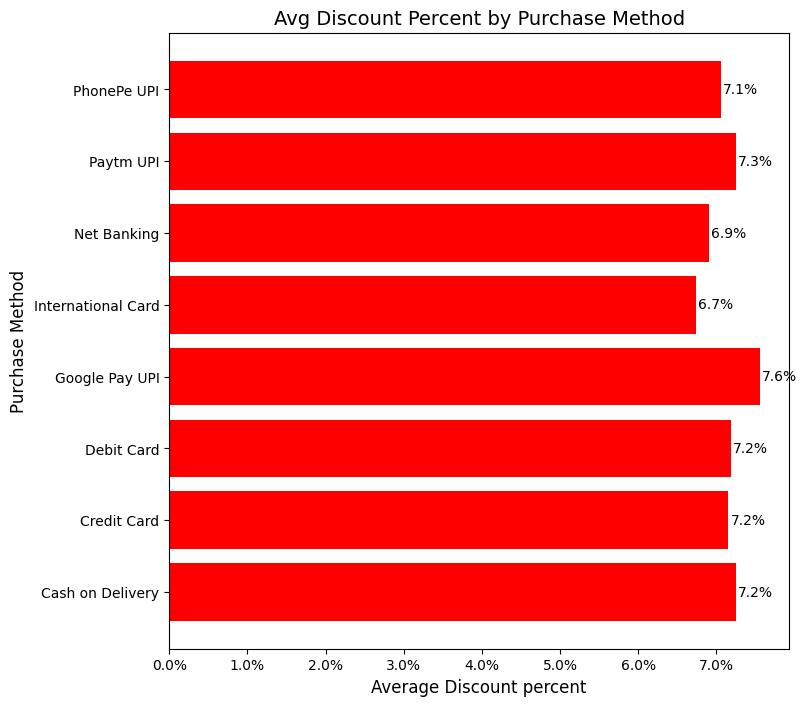

In [132]:
fig, ax = plt.subplots(figsize=(8,8))
bars = ax.barh(grouped_final['Purchase Method'],grouped_final['Discount percent'] , color='red')

# Set x-axis to be in millions (i.e., 1e6)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x:.1f}%'))

# Add the values at the end of each bar (rounded to the nearest million)
for bar in bars:
    width = bar.get_width()  # For horizontal bars, width is the value
    ax.text(width + 0.025,  # Position text to the right of the bar, slightly off the bar
            bar.get_y() + bar.get_height() / 2,  # Vertically centered text within the bar
            f'{width:.1f}%',  # Display value in millions, rounded
            ha='left', va='center', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Average Discount percent', fontsize=12)
ax.set_title('Avg Discount Percent by Purchase Method', fontsize=14)
ax.set_ylabel('Purchase Method', fontsize=12)
# ax.set_xticks(range(len(data['Product Category'])))  # Set the positions of the ticks
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation
# Show the plot
plt.show()

### 26.Discount percentage by each location

In [133]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [134]:
data.groupby('Location2')['Discount percent'].mean()

Location2
Metro        7.176436
Non Metro    7.011447
Name: Discount percent, dtype: float64

### 27.Total amount spent by payment mode


In [135]:
grouped_final = pd.DataFrame(data.groupby('Purchase Method')['Net Amount'].sum()).reset_index()
grouped_final

,Purchase Method,Net Amount
0,Cash on Delivery,7.791551e+06
1,Credit Card,6.371597e+07
2,Debit Card,3.978930e+07
3,Google Pay UPI,7.508724e+06
4,International Card,8.049329e+06
5,Net Banking,1.577218e+07
6,Paytm UPI,7.734120e+06
7,PhonePe UPI,7.883451e+06


/tmp/ipykernel_30/2930234651.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation


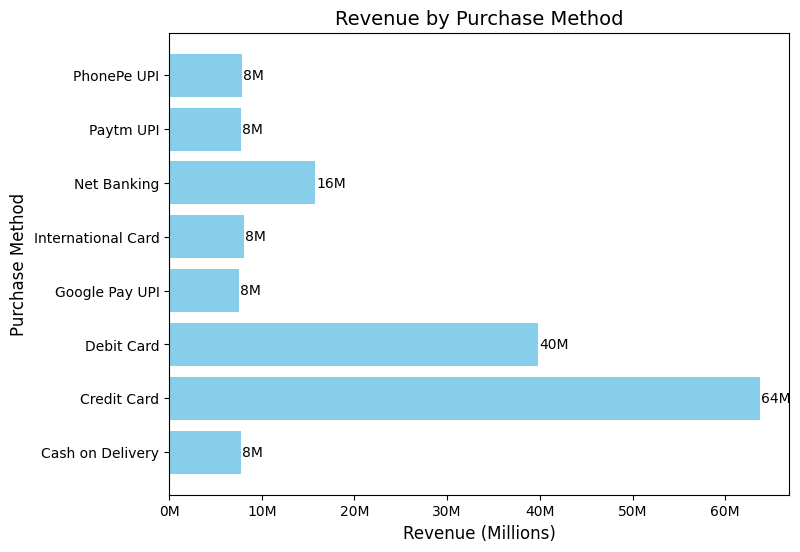

In [136]:
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.barh(grouped_final['Purchase Method'],grouped_final['Net Amount'] , color='skyblue')

# Set y-axis to be in millions (i.e., 1e6)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x * 1e-6)}M'))

# Add the values on top of each bar (rounded to the nearest million)
for bar in bars:
    width = bar.get_width()  # For horizontal bars, width is the value
    ax.text(width + 100000,  # Position text to the right of the bar, slightly off the bar
            bar.get_y() + bar.get_height() / 2,  # Vertically centered text within the bar
            f'{int(round(width / 1e6))}M',  # Display value in millions, rounded
            ha='left', va='center', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Revenue (Millions)', fontsize=12)
ax.set_title('Revenue by Purchase Method', fontsize=14)
ax.set_ylabel('Purchase Method', fontsize=12)
# ax.set_xticks(range(len(data['Product Category'])))  # Set the positions of the ticks
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)   # Set the labels with rotation
# Show the plot
plt.show()

### 28.Total amount spent by location

In [137]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [138]:
data.groupby('Location2')['Net Amount'].sum().round(2).apply(lambda x: f'{x:,}')

Location2
Metro        123,107,628.79
Non Metro     35,136,997.41
Name: Net Amount, dtype: object

In [139]:
value = data.groupby('Location2')['Net Amount'].sum().round(2)
percent = ((value/value.sum())*100).apply(lambda x: f'{x:.1f}%')
percent

Location2
Metro        77.8%
Non Metro    22.2%
Name: Net Amount, dtype: object

### 29.Payment mode by location

In [140]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [141]:
data.groupby(['Location2','Purchase Method'])['TID'].count()

Location2  Purchase Method   
Metro      Cash on Delivery       2137
           Credit Card           17031
           Debit Card            10649
           Google Pay UPI         2084
           International Card     2172
           Net Banking            4173
           Paytm UPI              2092
           PhonePe UPI            2053
Non Metro  Cash on Delivery        598
           Credit Card            4840
           Debit Card             2992
           Google Pay UPI          554
           International Card      612
           Net Banking            1245
           Paytm UPI               553
           PhonePe UPI             602
Name: TID, dtype: int64

In [142]:
value = data.groupby(['Location2','Purchase Method'])['TID'].count()
percent = ((value/value.groupby('Location2').sum())*100).apply(lambda x: f'{x:.1f}%')
percent

Location2  Purchase Method   
Metro      Cash on Delivery       5.0%
           Credit Card           40.2%
           Debit Card            25.1%
           Google Pay UPI         4.9%
           International Card     5.1%
           Net Banking            9.8%
           Paytm UPI              4.9%
           PhonePe UPI            4.8%
Non Metro  Cash on Delivery       5.0%
           Credit Card           40.3%
           Debit Card            24.9%
           Google Pay UPI         4.6%
           International Card     5.1%
           Net Banking           10.4%
           Paytm UPI              4.6%
           PhonePe UPI            5.0%
Name: TID, dtype: object

## Hypothesis Testing

### 1. Impact of gender on transaction amount

In [143]:
#Null Hypothesis : The average transaction size does not differ across genders
#Alternate Hypothesis : The average transaction size differs across genders
# I am considering only male and female for this example

In [144]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month,Discount percent,full_date
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,2023,8,30,20,Wednesday,No,night,end,8.865248,2023-08-30
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,2024,2,23,9,Friday,No,day,middle,3.776467,2024-02-23
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,2022,3,6,9,Sunday,Yes,day,start,10.649563,2022-03-06
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,2020,11,4,4,Wednesday,No,night,start,0.000000,2020-11-04
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,2022,5,31,17,Tuesday,No,day,end,19.188263,2022-05-31


In [145]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [146]:
data.Gender.value_counts()

Gender
Other     18266
Female    18228
Male      17893
Name: count, dtype: int64

In [147]:
data.groupby('Gender')['Net Amount'].mean()

Gender
Female    2893.331935
Male      2901.824015
Other     2933.462969
Name: Net Amount, dtype: float64

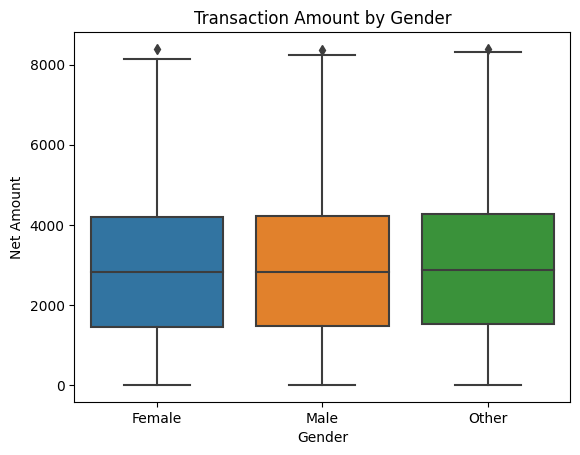

In [148]:
#checking the normality of the distribution of groups
sns.boxplot(x='Gender', y='Net Amount', data=data)
plt.title('Transaction Amount by Gender')
plt.show()


In [149]:
# Check normality (Shapiro-Wilk test) for both groups
import scipy.stats as stats

male_data = data[data['Gender'] == 'Male']['Net Amount']
female_data = data[data['Gender'] == 'Female']['Net Amount']

shapiro_male = stats.shapiro(male_data)
shapiro_female = stats.shapiro(female_data)

print(f"Shapiro-Wilk test for male transactions: statistic={shapiro_male.statistic}, p-value={shapiro_male.pvalue}")
print(f"Shapiro-Wilk test for female transactions: statistic={shapiro_female.statistic}, p-value={shapiro_female.pvalue}")


Shapiro-Wilk test for male transactions: statistic=0.9743723933988043, p-value=5.0763206872522737e-48
Shapiro-Wilk test for female transactions: statistic=0.9738077418252767, p-value=1.0545552049186251e-48


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17893.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18228.
  res = hypotest_fun_out(*samples, **kwds)


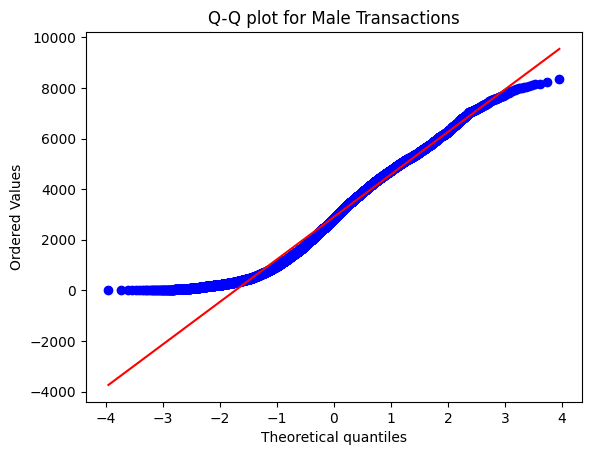

In [170]:
stats.probplot(male_data, dist="norm", plot=plt)
plt.title("Q-Q plot for Male Transactions")
plt.show()

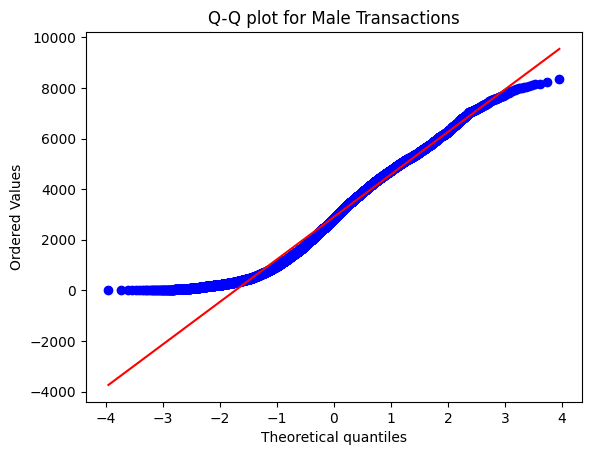

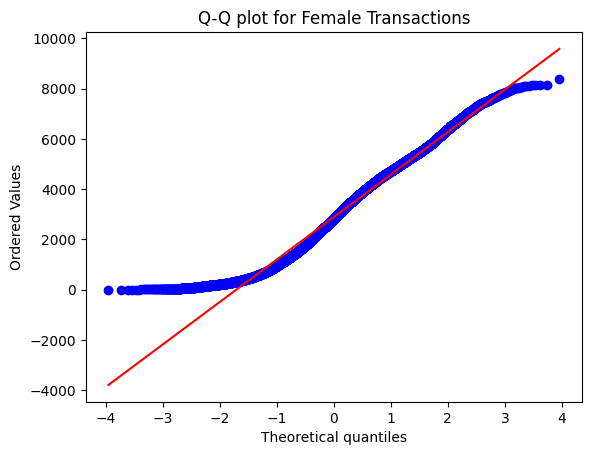

In [150]:
# using Q-Q plot to check for normality as shapiro might be inaccurate
# Q-Q plot for male data
stats.probplot(male_data, dist="norm", plot=plt)
plt.title("Q-Q plot for Male Transactions")
plt.show()

# Q-Q plot for female data
stats.probplot(female_data, dist="norm", plot=plt)
plt.title("Q-Q plot for Female Transactions")
plt.show()

In [151]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for both groups
skew_male = skew(male_data)
kurt_male = kurtosis(male_data)

skew_female = skew(female_data)
kurt_female = kurtosis(female_data)

print(f"Skewness for male transactions: {skew_male}")
print(f"Kurtosis for male transactions: {kurt_male}")
print(f"Skewness for female transactions: {skew_female}")
print(f"Kurtosis for female transactions: {kurt_female}")

Skewness for male transactions: 0.25394585168091516
Kurtosis for male transactions: -0.7355626897047847
Skewness for female transactions: 0.27133356184547613
Kurtosis for female transactions: -0.6959168276726433


In [152]:
from scipy.stats import kstest

# Perform a K-S test for normality
ks_stat_male, ks_p_male = kstest(male_data, 'norm', args=(np.mean(male_data), np.std(male_data)))
ks_stat_female, ks_p_female = kstest(female_data, 'norm', args=(np.mean(female_data), np.std(female_data)))

print(f"K-S test p-value for male transactions: {ks_p_male}")
print(f"K-S test p-value for female transactions: {ks_p_female}")

K-S test p-value for male transactions: 6.574907714072008e-46
K-S test p-value for female transactions: 1.4330011795450575e-49


In [153]:
# Check for equal variance (Levene's Test)
levene_stat, levene_p = stats.levene(male_data, female_data)
print(f"Levene's Test for equality of variances: statistic={levene_stat}, p-value={levene_p}")


Levene's Test for equality of variances: statistic=0.562942313232851, p-value=0.45308205056813966


In [154]:
# As the data is not normal, using mannwhitneyu test

# Perform Mann-Whitney U test (non-parametric test)
u_stat, p_value = stats.mannwhitneyu(male_data, female_data, alternative='two-sided')

# Output the U-statistic and p-value
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation of the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the transaction sizes of males and females.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the transaction sizes of males and females.")


U-statistic: 163705964.5
P-value: 0.5254452011918256
Fail to reject the null hypothesis: There is no significant difference between the transaction sizes of males and females.


### 2. Impact of age group on product category preferences

In [155]:
data.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,...,Year,Month,Day,Hour_of_day,day_of_week,weekend,day_night,time_of_month,Discount percent,full_date
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,...,2023,8,30,20,Wednesday,No,night,end,8.865248,2023-08-30
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,...,2024,2,23,9,Friday,No,day,middle,3.776467,2024-02-23
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,...,2022,3,6,9,Sunday,Yes,day,start,10.649563,2022-03-06
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,...,2020,11,4,4,Wednesday,No,night,start,0.000000,2020-11-04
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,...,2022,5,31,17,Tuesday,No,day,end,19.188263,2022-05-31


In [156]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [157]:
## creating a contingency table
pairwise_counts = pd.crosstab(data['Age Group'], data['Product Category'])
pairwise_counts

Product Category,Beauty and Health,Books,Clothing,Electronics,Home & Kitchen,Other,Pet Care,Sports & Fitness,Toys & Games
Age Group,,,,,,,,,
18-25,2494,781,3274,4952,1606,612,487,1577,453
25-45,3273,1089,4309,6555,2201,860,636,2229,637
45-60,1670,569,2194,3248,1061,467,312,1168,288
60 and above,404,144,537,777,262,99,91,276,64
under 18,414,151,519,830,299,105,79,264,70


In [158]:

# Perform Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pairwise_counts)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between age group and product category.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between age group and product category.")


Chi-Square Statistic: 31.63613654893272
P-value: 0.48489280711859517
Degrees of Freedom: 32
Expected Frequencies: 
[[2464.34221413  816.1734238  3233.94539136 4884.50239947 1620.70428595
   639.74383584  479.13619063 1646.07909978  451.37315903]
 [3307.19096475 1095.31921231 4340.01208009 6555.08886315 2175.01390038
   858.54757571  643.00926692 2209.06735065  605.75078603]
 [1666.11754647  551.80682884 2186.43868939 3302.36405759 1095.7422362
   432.52451873  323.93926858 1112.89789839  305.16895582]
 [ 402.83100741  133.41489694  528.63334988  798.43984776  264.92665527
   104.57502712   78.32147388  269.07452148   73.78322025]
 [ 414.51826723  137.28563811  543.97048927  821.60483204  272.61292221
   107.6090426    80.59379999  276.88112968   75.92387887]]
Fail to reject the null hypothesis: There is no significant relationship between age group and product category.


### 3. Purchase method preference by location

In [159]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [171]:
## creating a contingency table
pairwise_counts = pd.crosstab(data['Purchase Method'], data['Location2'])
pairwise_counts

Location2,Metro,Non Metro
Purchase Method,,
Cash on Delivery,2137,598
Credit Card,17031,4840
Debit Card,10649,2992
Google Pay UPI,2084,554
International Card,2172,612
Net Banking,4173,1245
Paytm UPI,2092,553
PhonePe UPI,2053,602


In [172]:
# Perform Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pairwise_counts)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between purchase method and location.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between purchase method and location.")


Chi-Square Statistic: 7.267788244223159
P-value: 0.40154059457434416
Degrees of Freedom: 7
Expected Frequencies: 
[[ 2131.74811996   603.25188004]
 [17046.97006638  4824.02993362]
 [10632.23989189  3008.76010811]
 [ 2056.14315921   581.85684079]
 [ 2169.94031662   614.05968338]
 [ 4222.96574549  1195.03425451]
 [ 2061.59918731   583.40081269]
 [ 2069.39351316   585.60648684]]
Fail to reject the null hypothesis: There is no significant relationship between purchase method and location.


### 4. Effect of product category on transaction amount

In [162]:
data.columns

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location', 'Location2', 'Year', 'Month', 'Day',
       'Hour_of_day', 'day_of_week', 'weekend', 'day_night', 'time_of_month',
       'Discount percent', 'full_date'],
      dtype='object')

In [163]:
product_list = list(data['Product Category'].unique())

In [164]:
i = 0
group_data = {}
for item in product_list:
    i += 1
    group_data['group_'+str(i)] = data[data['Product Category'] == item]['Net Amount'].to_list()
    # group_data.append(group_ + str(i))

In [165]:
#checking normality
from scipy.stats import shapiro
for key,value in group_data.items():
    stat, p = shapiro(value)
    print(f"Shapiro test p-value for {key}: {p}")

Shapiro test p-value for group_1: 3.0230326672027863e-46
Shapiro test p-value for group_2: 2.3611220030667713e-40
Shapiro test p-value for group_3: 1.6466570226948407e-29
Shapiro test p-value for group_4: 4.9146597327023496e-17
Shapiro test p-value for group_5: 1.7988539455702226e-30
Shapiro test p-value for group_6: 6.396539912937659e-22
Shapiro test p-value for group_7: 1.542983093123119e-36
Shapiro test p-value for group_8: 1.5462524236717142e-19
Shapiro test p-value for group_9: 1.616758140774505e-15


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16362.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10833.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5514.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5429.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.st

In [166]:
from scipy.stats import kstest

for key,value in group_data.items():
    ks_stat, ks_p = kstest(value, 'norm', args=(np.mean(value), np.std(value)))
    print(f"K-S test p-value for {key} transactions: {ks_p_male}")

# these are not normal

K-S test p-value for group_1 transactions: 6.574907714072008e-46
K-S test p-value for group_2 transactions: 6.574907714072008e-46
K-S test p-value for group_3 transactions: 6.574907714072008e-46
K-S test p-value for group_4 transactions: 6.574907714072008e-46
K-S test p-value for group_5 transactions: 6.574907714072008e-46
K-S test p-value for group_6 transactions: 6.574907714072008e-46
K-S test p-value for group_7 transactions: 6.574907714072008e-46
K-S test p-value for group_8 transactions: 6.574907714072008e-46
K-S test p-value for group_9 transactions: 6.574907714072008e-46


In [167]:
str_new = ''
for key in group_data.keys():
    str_new += f'group_data["{key}"]'+','

print(str_new)

group_data["group_1"],group_data["group_2"],group_data["group_3"],group_data["group_4"],group_data["group_5"],group_data["group_6"],group_data["group_7"],group_data["group_8"],group_data["group_9"],


In [168]:
#checking homogeneity
from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
stat, p = levene(group_data["group_1"],group_data["group_2"],group_data["group_3"],group_data["group_4"],group_data["group_5"],group_data["group_6"],group_data["group_7"],group_data["group_8"],group_data["group_9"])
print(f"Levene's Test p-value: {p}")

## hence the variances are almost same

Levene's Test p-value: 0.5202788437326867


In [169]:
## because normal tests are failing, using kruskal-wallis H test
stat, p_value = stats.kruskal(group_data["group_1"],group_data["group_2"],group_data["group_3"],group_data["group_4"],group_data["group_5"],group_data["group_6"],group_data["group_7"],group_data["group_8"],group_data["group_9"])

print("Kruskal-Wallis H-statistic:", stat)
print("p-value:", p_value)

# As the p-value is greater than 0.05 no effect of product category on the transaction amount

Kruskal-Wallis H-statistic: 7.330639552080574
p-value: 0.501415182251707
